<a href="https://colab.research.google.com/github/FarshadBorjalizade/Image-processing/blob/gh-pages/Copy_of_Copy_of_Cell.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!unrar x "/content/drive/MyDrive/Dataset/image_processing_HW3.rar" "/content/sample_data/Img_HW3"


UNRAR 5.50 freeware      Copyright (c) 1993-2017 Alexander Roshal


Extracting from /content/drive/MyDrive/Dataset/image_processing_HW3.rar

Creating    /content/sample_data/Img_HW3/Balle_cell_1                 OK
Extracting  /content/sample_data/Img_HW3/Balle_cell_1/Im001_1.tif          0%  OK 
Extracting  /content/sample_data/Img_HW3/Balle_cell_1/Im002_1.tif          0%  OK 
Extracting  /content/sample_data/Img_HW3/Balle_cell_1/Im003_1.tif          1%  OK 
Extracting  /content/sample_data/Img_HW3/Balle_cell_1/Im004_1.tif          1%  OK 
Extracting  /content/sample_data/Img_HW3/Balle_cell_1/Im005_1.tif          1%  2%  OK 
Extracting  /content/sample_data/Img_HW3/Balle_cell_1/Im006_1.tif          2%  OK 
Extracting  /content/sample_data/Img_HW3/Balle_cell_1/Im007_1.tif          2%  OK 
Extracting  /content/sample_data/Img_HW3/Balle_cell_1/Im008_1.tif          3%  OK 
Extracting  /content/sample_data/Img_HW3/

In [3]:
import tensorflow as tf
import PIL
import pandas as pd
import numpy as np
import os
import cv2
import random
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow import keras
from matplotlib import pyplot as plt
from PIL import Image
from keras.preprocessing.image import ImageDataGenerator
from skimage import io
%matplotlib inline

In [4]:
dataset_dir = r'/content/sample_data/Img_HW3'

**Show some randome image before Augmentation**



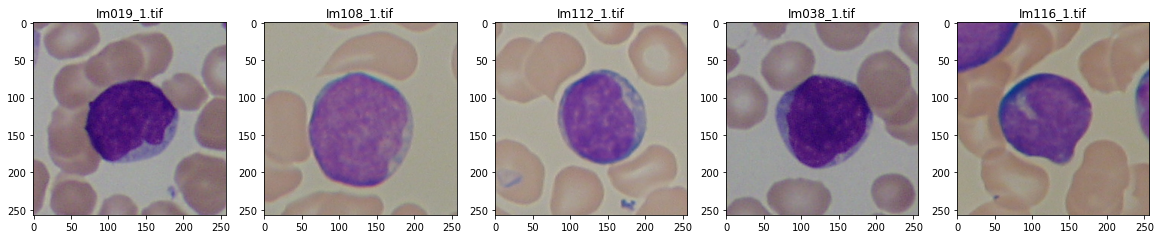

In [5]:
plt.figure(figsize=(20,20))

img_folder = os.path.join(dataset_dir, 'Balle_cell_1')
#print(img_folder)
for i in range(5):
    file = random.choice(os.listdir(img_folder))
    image_path= os.path.join(img_folder, file)
    img=io.imread(image_path)
    ax=plt.subplot(1,5,i+1)
    ax.title.set_text(file)
    plt.imshow(img)

In [6]:
print(type(img), img.dtype)
print(img.shape)

<class 'numpy.ndarray'> uint8
(257, 257, 3)


In [7]:
folder_list = os.listdir(dataset_dir)
folder_list

['Not_balle_cell_0', 'Balle_cell_1']

In [8]:
data = []
labels = []
class_labels = {'Not_balle_cell_0': 0, 'Balle_cell_1': 1}

**Image agmentation**

In [9]:
datagen1 = ImageDataGenerator(        
            rotation_range=45,
            width_shift_range=0.2,  
            height_shift_range=0.2,    
            shear_range=0.2,        
            zoom_range=0.2,        
            horizontal_flip=True,         
            fill_mode='constant', cval=125)

In [10]:
BATCH_SIZE = 32
TARGET_SIZE = (257, 257, 3)
datagen1 = datagen1.flow_from_directory(
    dataset_dir,
    target_size=TARGET_SIZE[:2],
    batch_size=BATCH_SIZE,
    class_mode='categorical')

Found 260 images belonging to 2 classes.


In [11]:
datagen2 = ImageDataGenerator(        
            rotation_range=45,
            width_shift_range=0.2,  
            height_shift_range=0.2,    
            shear_range=0.2,        
            zoom_range=0.2,        
            horizontal_flip=True,         
            fill_mode='constant', cval=125)

In [12]:
for class_folder in folder_list:
    image_list = os.listdir(os.path.join(dataset_dir, class_folder))
    
    for image_name in image_list:
        current_image_path = os.path.join(dataset_dir, class_folder, image_name)
        image = io.imread(current_image_path)
        #print(image.shape)
        image = image.reshape((1, ) + image.shape)
        #print(image.shape)
        j = 0
        for batch in datagen2.flow(image, batch_size=16,
                                  save_to_dir=os.path.join(dataset_dir, class_folder),
                                  save_prefix='aug',
                                  save_format='tif'):    
            j += 1    
            if j > 3:        
                break

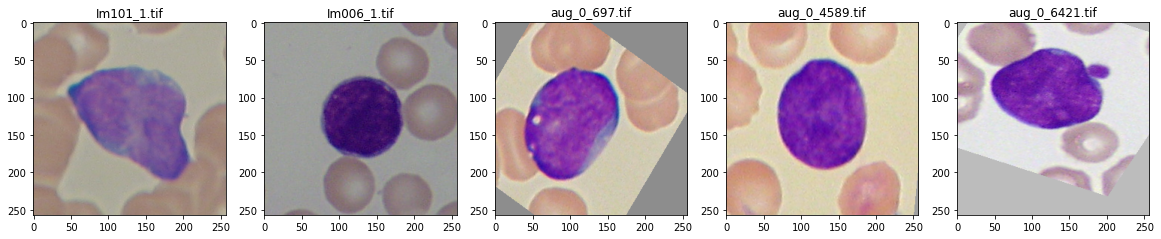

In [13]:
plt.figure(figsize=(20,20))

img_folder = os.path.join(dataset_dir, 'Balle_cell_1')
#print(img_folder)
for i in range(5):
    file = random.choice(os.listdir(img_folder))
    image_path= os.path.join(img_folder, file)
    img=io.imread(image_path)
    ax=plt.subplot(1,5,i+1)
    ax.title.set_text(file)
    plt.imshow(img)

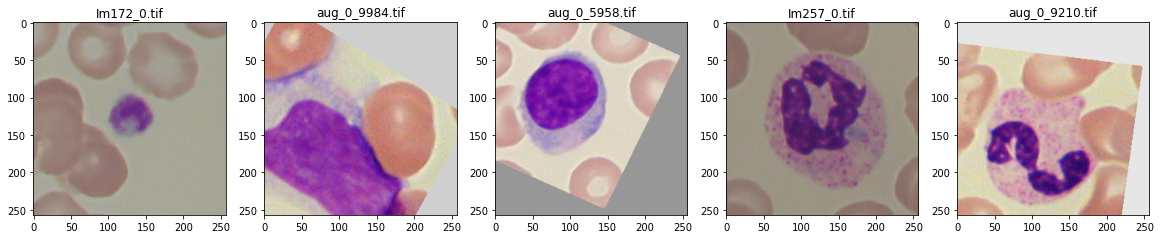

In [14]:
plt.figure(figsize=(20,20))

img_folder = os.path.join(dataset_dir, 'Not_balle_cell_0')
#print(img_folder)
for i in range(5):
    file = random.choice(os.listdir(img_folder))
    image_path= os.path.join(img_folder, file)
    img=io.imread(image_path)
    ax=plt.subplot(1,5,i+1)
    ax.title.set_text(file)
    plt.imshow(img)

In [15]:
datagen3 = ImageDataGenerator(        
            rotation_range=45,
            width_shift_range=0.2,  
            height_shift_range=0.2,    
            shear_range=0.2,        
            zoom_range=0.2,        
            horizontal_flip=True,         
            fill_mode='constant', cval=125)

In [16]:
BATCH_SIZE = 32
TARGET_SIZE = (257, 257, 3)
datagen3 = datagen3.flow_from_directory(
    '/content/sample_data/Img_HW3',
    target_size=TARGET_SIZE[:2],
    batch_size=BATCH_SIZE,
    class_mode='categorical')

Found 1268 images belonging to 2 classes.


In [17]:
my_data = []
my_labels = []
for class_folder in folder_list:
    image_list = os.listdir(os.path.join(dataset_dir, class_folder))
    #print(image_list)
    for image_name in image_list:
        current_image_path = os.path.join(dataset_dir, class_folder, image_name)
        image = cv2.imread(current_image_path)
        image = cv2.resize(image, (257, 257))
        
        my_data.append(image)
        my_labels.append(class_labels[class_folder])

In [65]:
len(my_data), type(my_data), my_data[0].dtype

(1268, numpy.ndarray, dtype('uint8'))

In [66]:
len(my_labels), type(my_labels)

(1268, numpy.ndarray)

In [67]:
my_data = np.array(my_data)
my_labels = np.array(my_labels)

In [68]:
my_data.shape, type(my_data), my_data.dtype

((1268, 257, 257, 3), numpy.ndarray, dtype('uint8'))

In [69]:
my_labels.shape, type(my_labels), my_labels.dtype

((1268,), numpy.ndarray, dtype('int64'))

(0, <matplotlib.image.AxesImage at 0x7efe9a705250>)

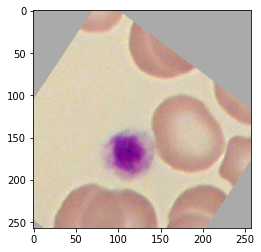

In [70]:
my_labels[0], plt.imshow(cv2.cvtColor(my_data[0], cv2.COLOR_BGR2RGB))

(1, <matplotlib.image.AxesImage at 0x7efe9a6e5690>)

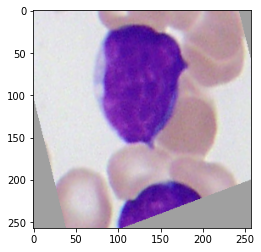

In [71]:
my_labels[800], plt.imshow(cv2.cvtColor(my_data[800], cv2.COLOR_BGR2RGB))

In [72]:
prev_state = np.random.get_state()
np.random.shuffle(my_data)
np.random.set_state(prev_state)
np.random.shuffle(my_labels)

(0, <matplotlib.image.AxesImage at 0x7efe9a64e690>)

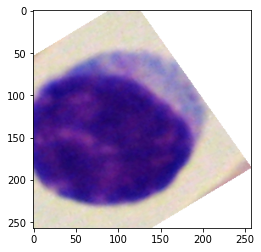

In [73]:
my_labels[0], plt.imshow(cv2.cvtColor(my_data[0], cv2.COLOR_BGR2RGB))

(0, <matplotlib.image.AxesImage at 0x7efe9a633d10>)

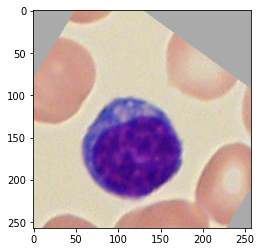

In [74]:
my_labels[800], plt.imshow(cv2.cvtColor(my_data[800], cv2.COLOR_BGR2RGB))

In [86]:
train_x, train_y = my_data[:1020], my_labels[:1020]

In [87]:
val_x, val_y = my_data[1020:], my_labels[1020:]

In [88]:
type(train_x), train_x.dtype, train_x.shape

(numpy.ndarray, dtype('uint8'), (1020, 257, 257, 3))

In [89]:
type(train_y), train_y.dtype, train_y.shape

(numpy.ndarray, dtype('int64'), (1020,))

In [90]:
type(val_x), val_x.dtype, val_x.shape

(numpy.ndarray, dtype('uint8'), (248, 257, 257, 3))

In [91]:
type(val_y), val_y.dtype, val_y.shape

(numpy.ndarray, dtype('int64'), (248,))

In [92]:
from tensorflow.keras.utils import to_categorical

In [93]:
train_y = to_categorical(train_y, num_classes=2)
train_y.shape, train_y.dtype

((1020, 2), dtype('float32'))

In [94]:
train_y[0]

array([1., 0.], dtype=float32)

In [95]:
val_y = to_categorical(val_y, num_classes=2)
val_y.shape, val_y.dtype

((248, 2), dtype('float32'))

In [96]:
train_x = train_x.astype('float32') / 255.0
train_x.shape, train_x.dtype

((1020, 257, 257, 3), dtype('float32'))

In [97]:
val_x = val_x.astype('float32') / 255.0
val_x.shape, val_x.dtype

((248, 257, 257, 3), dtype('float32'))

In [98]:
train_x.mean(), train_x.max(), train_x.min()

(0.64816886, 1.0, 0.0)

In [99]:
val_x.mean(), val_x.max(), val_x.min()

(0.6535285, 1.0, 0.0)

In [100]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPool2D, Flatten, GlobalAveragePooling2D, Dropout, ReLU, ZeroPadding2D

In [101]:
input_layer = Input(shape=(257, 257, 3))

x = Conv2D(filters=256, kernel_size=(3, 3), strides=2, padding='same')(input_layer)
x = ReLU()(x)
x = ZeroPadding2D(padding=(0, 0))(x)
x = MaxPool2D(pool_size=(2, 2), strides=2 , padding='valid')(x)

x = ZeroPadding2D(padding=(2, 2))(x)
x = Conv2D(filters=128, kernel_size=(3, 3), strides=1, padding='valid')(x)
x = ReLU()(x)
x = MaxPool2D(pool_size=(2, 2), strides=2 , padding='valid')(x)

x = ZeroPadding2D(padding=(3, 3))(x)
x = Conv2D(filters=96, kernel_size=(5, 5), strides=1, padding='valid')(x)
x = ReLU()(x)

x = ZeroPadding2D(padding=(2, 2))(x)
x = Conv2D(filters=96, kernel_size=(5, 5), strides=1, padding='valid')(x)
x = ReLU()(x)

x = ZeroPadding2D(padding=(2, 2))(x)
x = Conv2D(filters=32, kernel_size=(3, 3), strides=1, padding='valid')(x)
x = ReLU()(x)
x = MaxPool2D(pool_size=(3, 3), strides=2 , padding='valid')(x)

x = GlobalAveragePooling2D()(x)

x = Dense(units=1000, activation='relu')(x)
x = ReLU()(x)
x = Dropout(0.5)(x)

predictions_layer = Dense(units=2, activation='softmax')(x)

my_cell_classifier_model = Model(inputs=input_layer, outputs=predictions_layer)
my_cell_classifier_model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 257, 257, 3)]     0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 129, 129, 256)     7168      
_________________________________________________________________
re_lu_6 (ReLU)               (None, 129, 129, 256)     0         
_________________________________________________________________
zero_padding2d_5 (ZeroPaddin (None, 129, 129, 256)     0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 64, 64, 256)       0         
_________________________________________________________________
zero_padding2d_6 (ZeroPaddin (None, 68, 68, 256)       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 66, 66, 128)       2950

In [102]:
opt = keras.optimizers.Adam(learning_rate=0.0001)
my_cell_classifier_model.compile(optimizer=opt , loss='binary_crossentropy', metrics=['accuracy'])

In [103]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_accuracy', mode='max', verbose=0, patience=151, restore_best_weights=True)

In [104]:
my_cell_classifier_model.fit(x=train_x, y=train_y,
                             epochs=110,
                             batch_size=100,
                             shuffle=True,
                             validation_data=(val_x, val_y))

Epoch 1/110
11/11 [==============================] - 7s 620ms/step - loss: 0.6932 - accuracy: 0.5098 - val_loss: 0.6934 - val_accuracy: 0.4556
Epoch 2/110
11/11 [==============================] - 3s 307ms/step - loss: 0.6929 - accuracy: 0.5108 - val_loss: 0.6942 - val_accuracy: 0.4556
Epoch 3/110
11/11 [==============================] - 3s 308ms/step - loss: 0.6921 - accuracy: 0.5118 - val_loss: 0.6934 - val_accuracy: 0.4556
Epoch 4/110
11/11 [==============================] - 3s 305ms/step - loss: 0.6870 - accuracy: 0.5137 - val_loss: 0.6871 - val_accuracy: 0.4556
Epoch 5/110
11/11 [==============================] - 3s 309ms/step - loss: 0.6727 - accuracy: 0.5294 - val_loss: 0.7030 - val_accuracy: 0.4556
Epoch 6/110
11/11 [==============================] - 3s 310ms/step - loss: 0.6613 - accuracy: 0.5637 - val_loss: 0.6539 - val_accuracy: 0.6371
Epoch 7/110
11/11 [==============================] - 3s 308ms/step - loss: 0.6510 - accuracy: 0.6775 - val_loss: 0.8197 - val_accuracy: 0.4556

In [105]:
from tensorflow.keras.models import load_model, save_model

In [106]:
save_model(my_cell_classifier_model, '/content/drive/MyDrive', 'balle_cell.h5' )

INFO:tensorflow:Assets written to: /content/drive/MyDrive/assets


In [107]:
model_loss_history = pd.DataFrame({'loss': my_cell_classifier_model.history.history['loss'],
                                   'val_loss': my_cell_classifier_model.history.history['val_loss']})

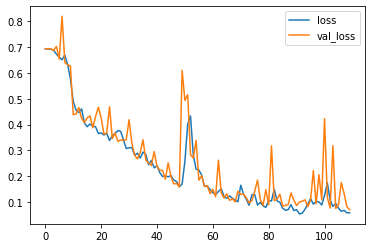

In [108]:
model_loss_history.plot()

In [109]:
model_accuracy_history = pd.DataFrame({'accuracy': my_cell_classifier_model.history.history['accuracy'],
                                       'val_accuracy': my_cell_classifier_model.history.history['val_accuracy']})

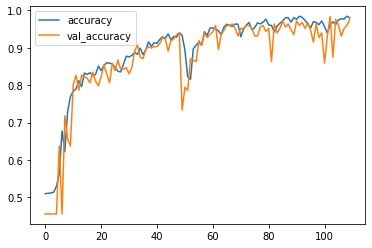

In [110]:
model_accuracy_history.plot()

In [111]:
model_accuracy_history['val_accuracy'].max()

0.9838709831237793

In [112]:
my_cell_classifier_model.evaluate(x=val_x, y=val_y)

8/8 [==============================] - 1s 165ms/step - loss: 0.0703 - accuracy: 0.9758


[0.07025083154439926, 0.975806474685669]

In [113]:
from sklearn.metrics import classification_report, confusion_matrix

In [114]:
model_predictions = my_cell_classifier_model.predict(val_x)

In [115]:
model_predictions

array([[9.99985099e-01, 1.48956897e-05],
       [5.20521076e-03, 9.94794786e-01],
       [9.99928355e-01, 7.16387221e-05],
       [9.99999881e-01, 1.43899797e-07],
       [1.00000000e+00, 3.59097085e-09],
       [9.99999881e-01, 7.45429674e-08],
       [1.00000000e+00, 3.31871249e-12],
       [9.99998331e-01, 1.63695529e-06],
       [6.60978840e-05, 9.99933839e-01],
       [1.00000000e+00, 2.11709636e-08],
       [4.64071898e-04, 9.99535918e-01],
       [2.25048007e-05, 9.99977469e-01],
       [2.79468030e-01, 7.20532000e-01],
       [1.72037716e-07, 9.99999881e-01],
       [9.99987841e-01, 1.21174444e-05],
       [1.00000000e+00, 3.39035115e-12],
       [1.00000000e+00, 4.48611114e-11],
       [4.01756665e-07, 9.99999642e-01],
       [6.73667789e-02, 9.32633221e-01],
       [9.99981403e-01, 1.86233283e-05],
       [9.99543846e-01, 4.56137845e-04],
       [1.84406395e-06, 9.99998212e-01],
       [9.98755813e-01, 1.24420202e-03],
       [6.24501070e-07, 9.99999404e-01],
       [9.998579

In [116]:
model_predictions.shape

(248, 2)

In [117]:
model_sparse_predictions = np.zeros(shape=model_predictions.shape)
predictions_sparse_labels= np.argmax(model_predictions, axis=1)

In [118]:
predictions_sparse_labels

array([0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1])

In [119]:
val_y =  np.argmax(val_y, axis=1)
val_y

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1])

In [120]:
print(classification_report(y_true=val_y, y_pred=predictions_sparse_labels))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98       135
           1       0.97      0.98      0.97       113

    accuracy                           0.98       248
   macro avg       0.98      0.98      0.98       248
weighted avg       0.98      0.98      0.98       248



In [121]:
cf_matrix = confusion_matrix(y_true=val_y, y_pred=predictions_sparse_labels)


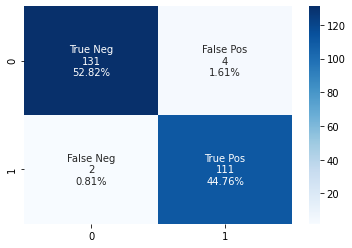

In [122]:
import seaborn as sns
labels = ['True Neg','False Pos','False Neg','True Pos']
#categories = ['Normal', 'Abnormal']
group_counts = ['{0:0.0f}'.format(value) for value in cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(labels, group_counts, group_percentages)]
#print(labels)
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')